# 1 - Select dataset loader

* Initially, to start conducting an experiment, it is necessary to choose a dataset that will be used by the models throughout the whole process. Currently, there are already several datasets in [**dataset_loaders.yaml**](../../irec/app/settings/dataset_loaders.yaml), you just need to choose an existing one, but you can also create and insert a custom dataset.
* After identifying the desired dataset, it is necessary to perform a preprocessing on the base, applying all the settings defined in [**dataset_loaders.yaml**](../../irec/app/settings/dataset_loaders.yaml). To do this, just execute the following command:

**Command** 
```console
$ python3 gen_base.py --dataset_loaders <one or more datasets>
```
**Example**
```console
$ python3 gen_base.py --dataset_loaders "MovieLens 1M"
```
**Output**
```console
Test shape: (187581, 4)
Train shape: (812628, 4)
```

# 2 - Execution

* After finishing the preprocessing, we can execute an agent, which requires the dataset that will be utilized as well as the evaluation policy. Currently, our framework counts with multiple models and evaluation policies already implemented that can be found inside [**models**](dir) and [**evaluation policies**](dir), respectively. Furthermore, as all this process is parallelized, the desired number of tasks can be given.

To execute an agent, just run the following command:

**Command** 
```console
$ python3 run_agent_best.py --agents <agents> --dataset_loaders <datasets> --evaluation_policy <eval policy> 
--tasks <num tasks (optional)>
```
**Example**
```console
$ python3 run_agent_best.py --agents UCB MostPopular --dataset_loaders "MovieLens 1M" --evaluation_policy FixedInteraction
```
**Output**
```console
INFO: 'agent' does not exist. Creating a new experiment
Starting UCB Training
Starting MostPopular Training
Ended MostPopular Training
Ended UCB Training
MostPopular: 100%|██████████████████████████████| 120800/120800 [00:13<00:00, 8896.20it/s]
UCB: 100%|██████████████████████████████████████| 120800/120800 [00:19<00:00, 6314.81it/s]
```


# 3 - Evaluating a Execution
* Afterward, we evaluate the execution performed in step 2. The evaluation process is quite simple. After the execution of an agent, all interactions made during the recommendation process are saved, from them, we can evaluate the whole process according to the evaluation policy defined. Thus, we only need to inform which agents will be evaluated under which dataset, along with the chosen evaluation metrics. This module is parallelized as well.

To evaluate one or more agents, just execute the following command:

**Command** 
```console
$ python3 run_eval_best.py --agents <agents> --dataset_loaders <datasets> --evaluation_policy <eval policy> 
--metrics <metrics> --tasks <num tasks (optional)>
```
**Example**
```console
$ python3 run_eval_best.py --agents UCB MostPopular --dataset_loaders "MovieLens 1M" --evaluation_policy FixedInteraction --metrics Hits Precision Recall
```
**Output**
```console
UserCumulativeInteraction {'interaction_size': 1, 'interactions_to_evaluate': [5, 10, 20, 50, 100], 'num_interactions': 100, 'relevance_evaluator_threshold': 3.999}
UserCumulativeInteraction {'interaction_size': 1, 'interactions_to_evaluate': [5, 10, 20, 50, 100], 'num_interactions': 100, 'relevance_evaluator_threshold': 3.999}
UserCumulativeInteraction {'interaction_size': 1, 'interactions_to_evaluate': [5, 10, 20, 50, 100], 'num_interactions': 100, 'relevance_evaluator_threshold': 3.999}
UserCumulativeInteraction {'interaction_size': 1, 'interactions_to_evaluate': [5, 10, 20, 50, 100], 'num_interactions': 100, 'relevance_evaluator_threshold': 3.999}
UserCumulativeInteraction {'interaction_size': 1, 'interactions_to_evaluate': [5, 10, 20, 50, 100], 'num_interactions': 100, 'relevance_evaluator_threshold': 3.999}
UserCumulativeInteraction {'interaction_size': 1, 'interactions_to_evaluate': [5, 10, 20, 50, 100], 'num_interactions': 100, 'relevance_evaluator_threshold': 3.999}
Computing interaction 5 with UserCumulativeInteraction
Computing interaction 5 with UserCumulativeInteraction
Computing interaction 10 with UserCumulativeInteraction
Computing interaction 10 with UserCumulativeInteraction
Computing interaction 5 with UserCumulativeInteraction
Computing interaction 20 with UserCumulativeInteraction
Computing interaction 5 with UserCumulativeInteraction
Computing interaction 10 with UserCumulativeInteraction
Computing interaction 10 with UserCumulativeInteraction
Computing interaction 20 with UserCumulativeInteraction
Computing interaction 20 with UserCumulativeInteraction
Computing interaction 5 with UserCumulativeInteraction
Computing interaction 5 with UserCumulativeInteraction
Computing interaction 20 with UserCumulativeInteraction
Computing interaction 10 with UserCumulativeInteraction
Computing interaction 10 with UserCumulativeInteraction
Computing interaction 20 with UserCumulativeInteraction
Computing interaction 50 with UserCumulativeInteraction
Computing interaction 50 with UserCumulativeInteraction
Computing interaction 20 with UserCumulativeInteraction
Computing interaction 50 with UserCumulativeInteraction
Computing interaction 50 with UserCumulativeInteraction
Computing interaction 50 with UserCumulativeInteraction
Computing interaction 100 with UserCumulativeInteraction
UserCumulativeInteraction spent 2.08 seconds executing Precision metric
Computing interaction 50 with UserCumulativeInteraction
Computing interaction 100 with UserCumulativeInteraction
UserCumulativeInteraction spent 2.97 seconds executing Hits metric
Computing interaction 100 with UserCumulativeInteraction
UserCumulativeInteraction spent 2.25 seconds executing Precision metric
Computing interaction 100 with UserCumulativeInteraction
UserCumulativeInteraction spent 3.45 seconds executing Recall metric
Computing interaction 100 with UserCumulativeInteraction
UserCumulativeInteraction spent 3.26 seconds executing Hits metric
Computing interaction 100 with UserCumulativeInteraction
UserCumulativeInteraction spent 3.08 seconds executing Recall metric
```


# 4 - Viewing the results
* There are several ways to visualize the results obtained by the models. After the execution of step 3, the evaluation metrics' results are saved, so it is possible to visualize them in different manners.

* One of many ways to visualize the results is using tables. To do this, just execute the following command:

**Command** 
```console
$ python3 print_latex_table.py --agents <agents> --dataset_loaders <datasets> --evaluation_policy <eval policy> 
--metric_evaluator <metric eval> --metrics <metrics>
```
**Example** 
```console
$ python3.9 print_latex_table.py --agents UCB MostPopular --dataset_loaders "MovieLens 1M" --evaluation_policy FixedInteraction --metric_evaluator UserCumulativeInteraction --metrics Hits Precision Recall
```
**Output** 
```console
PDF Table saved in: data/pdf/
Latex Table saved in: data/tex/table_MovieLens 1M.tex
Latexmk: This is Latexmk, John Collins, 26 Dec. 2019, version: 4.67.
Latexmk: All targets () are up-to-date
```

# Full Example

In [47]:
!cd ../app/ && models=(UCB MostPopular);bases=("MovieLens 1M");metrics=(Hits Precision Recall);\
python3 gen_base.py --dataset_loaders "${bases[@]}" &&\
python3 run_agent_best.py --agents "${models[@]}" --dataset_loaders "${bases[@]}" --evaluation_policy FixedInteraction &&\
python3 run_eval_best.py --agents "${models[@]}" --dataset_loaders "${bases[@]}" --evaluation_policy FixedInteraction --metrics "${metrics[@]}" &&\
python3 print_latex_table.py --agents "${models[@]}" --dataset_loaders "${bases[@]}" --evaluation_policy FixedInteraction --metric_evaluator UserCumulativeInteraction --metrics "${metrics[@]}"

Test shape: (200027, 4)
Train shape: (800182, 4)
Starting MostPopular Training
Ended MostPopular Training
UCB: 100%|████████████████████████████| 120800/120800 [00:22<00:00, 5299.89it/s]
UserCumulativeInteraction {'interaction_size': 1, 'interactions_to_evaluate': [5, 10, 20, 50, 100], 'num_interactions': 100, 'relevance_evaluator_threshold': 3.999}
UserCumulativeInteraction {'interaction_size': 1, 'interactions_to_evaluate': [5, 10, 20, 50, 100], 'num_interactions': 100, 'relevance_evaluator_threshold': 3.999}
UserCumulativeInteraction {'interaction_size': 1, 'interactions_to_evaluate': [5, 10, 20, 50, 100], 'num_interactions': 100, 'relevance_evaluator_threshold': 3.999}
UserCumulativeInteraction {'interaction_size': 1, 'interactions_to_evaluate': [5, 10, 20, 50, 100], 'num_interactions': 100, 'relevance_evaluator_threshold': 3.999}
UserCumulativeInteraction {'interaction_size': 1, 'interactions_to_evaluate': [5, 10, 20, 50, 100], 'num_interactions': 100, 'relevance_evaluator_thresho

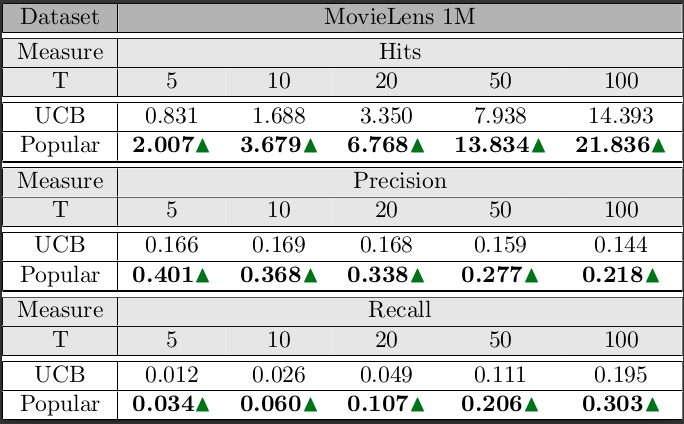